In [ ]:
from count import *
from match_nfa import * 

w4 = "a^[2,4["
regGrammar = lark.Lark.open("lang/regexp_test.lark", start="rege", parser="lalr")
tree = regGrammar.parse(w4)
reg : RegExp = BuildRegexp(context={"sigma": None}).transform(tree)
reg.setSigma(reg.setOfSymbols())
# x : matchNFA = reg.dfaBrzozowski()
# x : matchNFA = reg.nfaPDNaive()
# x : matchNFA = reg.toNFA("nfaPosCount")
x : matchNFA = reg.nfaPosition()
x.display()
# input_txt = "abbaab"
# res = x.table_matcher(input_txt)
# print(x.enum_matches(res, input_txt))

AttributeError: 'NoneType' object has no attribute 'copy'

In [11]:
w4 = "a^[3]"
tree = regGrammar.parse(w4)
reg : RegExp = BuildRegexp(context={"sigma": None}).transform(tree)
reg.setSigma(reg.setOfSymbols())
z = reg.partialDerivatives("a")
print(reg)
print(z)

a^3
{CConcat({CEpsilon()},a^2)}


In [4]:
z = str2regexp("ab+ba")
z.dfaBrzozowski

<bound method RegExp.dfaBrzozowski of CDisj(CConcat(CAtom(a),CAtom(b)),CConcat(CAtom(b),CAtom(a)))>

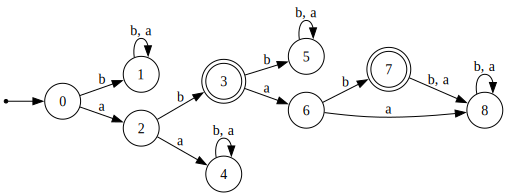

True

In [ ]:
from count import *
from match_nfa import * 
w4 = "((ab))^[1,3["
#w4 = "ab+ba"
regGrammar = lark.Lark.open("lang/regexp_test.lark", start="rege", parser="lalr")
tree = regGrammar.parse(w4)
reg : RegExp = BuildRegexp(context={"sigma": None}).transform(tree)
reg.setSigma(reg.setOfSymbols())
# f = reg.linearForm()
# print(f)
# f = f["a"].pop().linearForm()
# print(f)
# f = f["b"].pop().linearForm()
# print(f)
# f = f["a"].pop().linearForm()
# print(f)
# f = f["b"].pop().linearForm()
# print(f)
# f = f["a"].pop().linearForm()
# print(f)
# f = f["b"].pop().linearForm()
# print(f)
x: DFA = reg.dfaBrzozowski()
x.display()
x.evalWordP("abab")

In [6]:
x.evalWordP("ba")

False

In [7]:
def dfa_step(x:DFA, input_sym, current_state):
	for i in x.delta:
		outsymbols = x.delta[i]
		for sym in outsymbols:
			if str(sym) == str(input_sym) and current_state == i:
				return (True, x.delta[i][sym])
			
	# if it gets here then eval from initial:
	for i in x.delta:
		outsymbols = x.delta[i]
		for sym in outsymbols:
			if str(sym) == str(input_sym) and i == x.Initial:
				return (False, x.delta[i][sym])
			
	return (False, x.Initial)

In [8]:
it = "ababababc"
cstate = x.Initial
match = ""

for i in it:
	nt = False
	match += i
	step_res, step_state = dfa_step(x, i, cstate)
	#print("step", i, match, step_res, step_state)
	cstate = step_state
	if step_res:
		if cstate in x.Final:
			print("reached final state", match)
	else:
		if cstate is not x.Initial:
			match = i
		else:
			match = ""
		print("Reset", cstate)

	# for y in x.delta:
	# 	outsymbols = x.delta[y]
	# 	for sym in outsymbols:
	# 		if str(sym) == str(i) and y == cstate:
	# 			nt = True
	# 			cstate = x.delta[y][sym]
	# 			print("w", sym, cstate)
	# 		else:
	# 			cstate = x.Initial
	# 			match=""

Reset {0}
Reset {0}
Reset {0}
Reset {0}
Reset {0}
Reset {0}
Reset {0}
Reset {0}
Reset {0}


In [9]:
x.evalWordP

<bound method NFA.evalWordP of NFA((['(a b)+', 'b (a b)+'], ['b', 'a'], ['(a b)+'], [], "[(CPlus(CConcat(CAtom(a),CAtom(b))), 'a', CConcat(CAtom(b),CPlus(CConcat(CAtom(a),CAtom(b))))), (CConcat(CAtom(b),CPlus(CConcat(CAtom(a),CAtom(b)))), 'b', CPlus(CConcat(CAtom(a),CAtom(b))))]"))>